Tuberias de estimadores
===

* 10:00 min | Última modificación: Abril 5, 2021 | [YouTube]

https://scikit-learn.org/stable/modules/compose.html

## Manejo de tuberías

In [1]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#
# Creación de una tubería de estimadores 
# asignando un identificador
#
estimators = [
    ("reduce_dim", PCA()),
    ("clf", SVC()),
]

pipeline = Pipeline(estimators)
pipeline

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [2]:
#
# Creación de una tubería con identificadores
# por defecto para sus componentes
#
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer

make_pipeline(
    Binarizer(),
    MultinomialNB(),
)

Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [3]:
#
# Acceso a la tupla mediante un índice
#
pipeline.steps[0]

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

In [4]:
#
# Acceso al estimador mediante un índice
#
pipeline[0]

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
#
# Accesso al estimador usando su nombre
#
pipeline['reduce_dim']

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
#
# Actualización de los parámetros de un estimador
# en la tubería
#
pipeline.set_params(clf__C=10)

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [7]:
#
# Especificación de una malla de valores de 
# parámetros en la tubería para buscar su 
# combinación óptima
# 
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    reduce_dim__n_components=[2, 5, 10],
    clf__C=[0.1, 10, 100],
)
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
)

In [8]:
#
# Creación de los modelos por fuera de la
# tubería e inspección de sus valores
#
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

pca = PCA()
svm = SVC()
pipeline = Pipeline(
    [
        ("reduce_dim", pca),
        ("clf", svm),
    ],
)
pipeline.fit(X_digits, y_digits)

pca.components_

array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 3.27805401e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697117e-01,  1.94547053e-02, -6.69693895e-03],
       [-1.68358559e-18,  1.83420720e-02,  1.26475543e-01, ...,
         2.32084163e-01,  1.67026563e-01,  3.48043832e-02],
       ...,
       [ 0.00000000e+00,  4.64905892e-16,  7.75864167e-17, ...,
         1.04083409e-16, -6.24500451e-17, -1.52655666e-16],
       [-0.00000000e+00,  1.66533454e-16,  2.23116834e-16, ...,
        -2.77555756e-16,  1.11022302e-16,  1.66533454e-16],
       [ 1.00000000e+00, -1.68983002e-17,  5.73338351e-18, ...,
         8.66631300e-18, -1.57615962e-17,  4.07058917e-18]])

## Ejemplo 1: Ensamble de ANOVA y una SVM

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection_pipeline.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-pipeline-py

In [9]:
from sklearn import set_config

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC

X, y = make_classification(
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
)

anova_filter = SelectKBest(f_classif, k=3)

clf = LinearSVC()

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=3,
                             score_func=<function f_classif at 0x7f2702562f28>)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

## Ejemplo 2: Encadenamiento e PCA() y regresión logística

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


<Figure size 720x360 with 0 Axes>

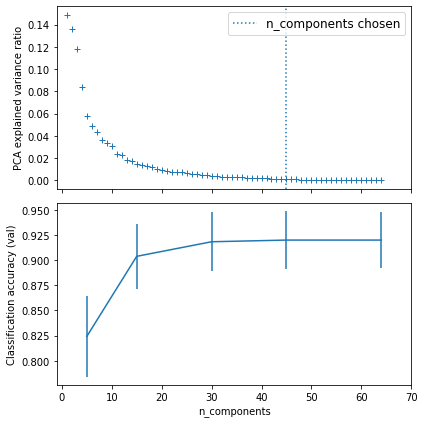

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


X_digits, y_digits = load_digits(return_X_y=True)


pca = PCA()
logisticRegression = LogisticRegression(max_iter=10000, tol=0.1)
pipeline = Pipeline(
    steps=[
        ("pca", pca),
        ("logistic", logisticRegression),
    ]
)


param_grid = {
    "pca__n_components": [5, 15, 30, 45, 64],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipeline, param_grid)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

pca.fit(X_digits)

#
# Gráfica
#
plt.figure(figsize=(10, 5))

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))

ax0.plot(
    np.arange(1, pca.n_components_ + 1),
    pca.explained_variance_ratio_,
    "+",
    linewidth=2,
)

ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

## Ejemplo 3: SVM con selección de características univariadas

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py

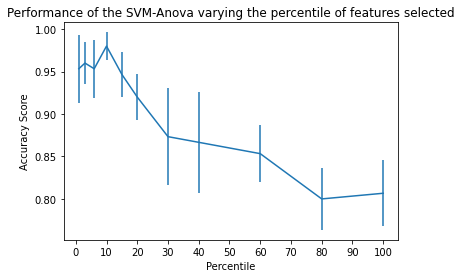

In [11]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ],
)

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()